# Project: Investing in Stocks Fall 2024


---



**Course: OPIM-5641-Business Decision Modeling**

Abir Shah

# 1 - Data Prep and EDA
* Retrieve real-world data from all S&P 500 stocks belonging to the sectors assigned to your groups from the web using Python.
* Clean the data (e.g., remove NaNs).
* Identify the three stocks in each sector assigned to your group (so 9 in total) with the highest return from January 1, 2017, to December 31, 2022.
* Present an overview of the selected stocks in each sector assigned to your group.


### Step 1: Import and install all of useful modules or packages.

In [ ]:
# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# some stock-specific packages
%%capture
import sys
import os

if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre
   !idaes get-extensions --to ./bin
   os.environ['PATH'] += ':bin'

%matplotlib inline
from pylab import *


import shutil
import sys
import os.path
from pyomo.environ import *
executable = '/content/bin/bonmin' # bonmin solver


In [ ]:
%%capture
# stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

###**Step 2: Start to prepare our data.**

In [ ]:

# ---------------------------
# Define Sector Tickers
# ---------------------------
# List of selected stock ticker symbols for each sector
utilities_tickers = ["NEE", "SO", "XEL"]
healthcare_tickers = ["ISRG", "CTLT", "ABBV"]
real_estate_tickers = ["PLD", "EQIX", "IRM"]

# ---------------------------
# Function to Retrieve Stock Data
# ---------------------------
def get_stock_data(tickers, start_date, end_date):
    """
    Retrieve stock price data for a list of tickers within a given date range.
    """
    # Initialize an empty dictionary to store the price data
    prices = {}

    # Loop through each ticker and get the data
    for ticker in tickers:
        prices[ticker] = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')['adjclose']

    # Convert the dictionary to a DataFrame
    price_data = pd.DataFrame(prices)

    return price_data

# ---------------------------
# Retrieve Data for All Sectors
# ---------------------------
# Set the date range
start_date = '01/01/2017'
end_date = '12/31/2022'

# Get the stock data for each sector
utilities_data = get_stock_data(utilities_tickers, start_date, end_date)
healthcare_data = get_stock_data(healthcare_tickers, start_date, end_date)
real_estate_data = get_stock_data(real_estate_tickers, start_date, end_date)

# ---------------------------
# Print Sector Data
# ---------------------------
print("\nUtilities Data:")
print(utilities_data)

print("\nHealthcare Data:")
print(healthcare_data)

print("\nReal Estate Data:")
print(real_estate_data)



Utilities Data:
                  NEE         SO        XEL
2017-01-03  24.404078  34.824120  32.103165
2017-01-04  24.476023  34.788616  32.245441
2017-01-05  24.461636  34.895130  32.245441
2017-01-06  24.389687  34.802818  32.340282
2017-01-09  24.328026  34.461971  31.850271
...               ...        ...        ...
2022-12-23  79.542419  66.472504  66.139320
2022-12-27  79.381775  66.963585  66.736092
2022-12-28  78.587967  66.389107  66.255386
2022-12-29  79.457382  66.889465  66.724823
2022-12-30  79.003754  66.166740  65.823517

[1510 rows x 3 columns]

Healthcare Data:
                  ISRG       CTLT        ABBV
2017-01-03   71.309998  27.000000   44.265289
2017-01-04   69.943336  27.309999   44.889435
2017-01-05   70.323334  26.900000   45.229885
2017-01-06   70.678886  26.879999   45.244076
2017-01-09   71.255554  26.910000   45.541965
...                ...        ...         ...
2022-12-23  262.660004  43.349998  151.238403
2022-12-27  263.970001  43.320000  151.13638

###**step 3: Handling Missing values**

In [ ]:
# ---------------------------
# Check for Missing Values
# ---------------------------

# Utilities sector
print("Missing values in Utilities sector:")
print(utilities_data.isnull().sum())

# Healthcare sector
print("\nMissing values in Healthcare sector:")
print(healthcare_data.isnull().sum())

# Real Estate sector
print("\nMissing values in Real Estate sector:")
print(real_estate_data.isnull().sum())


Missing values in Utilities sector:
NEE    0
SO     0
XEL    0
dtype: int64

Missing values in Healthcare sector:
ISRG    0
CTLT    0
ABBV    0
dtype: int64

Missing values in Real Estate sector:
PLD     0
EQIX    0
IRM     0
dtype: int64


###**Step 4: Detecting and Handling Outliers**

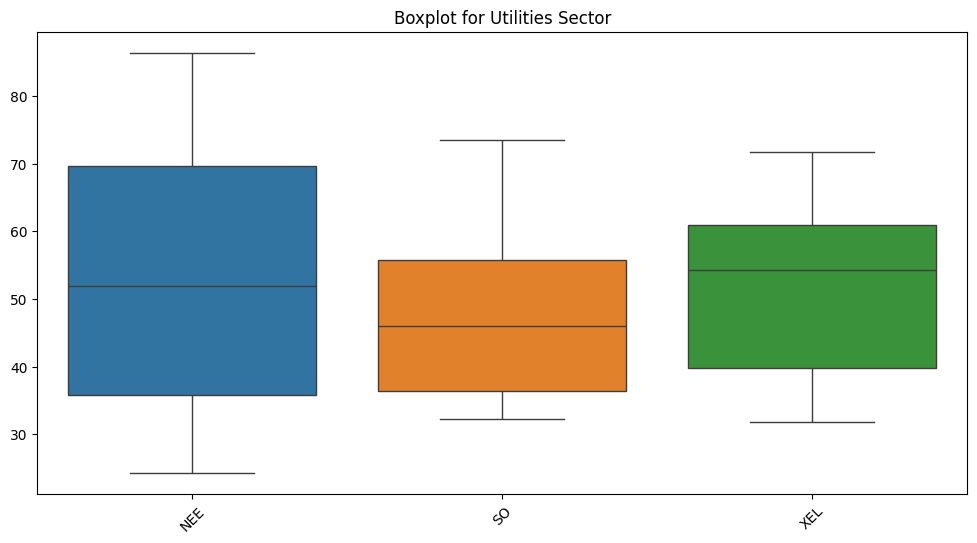

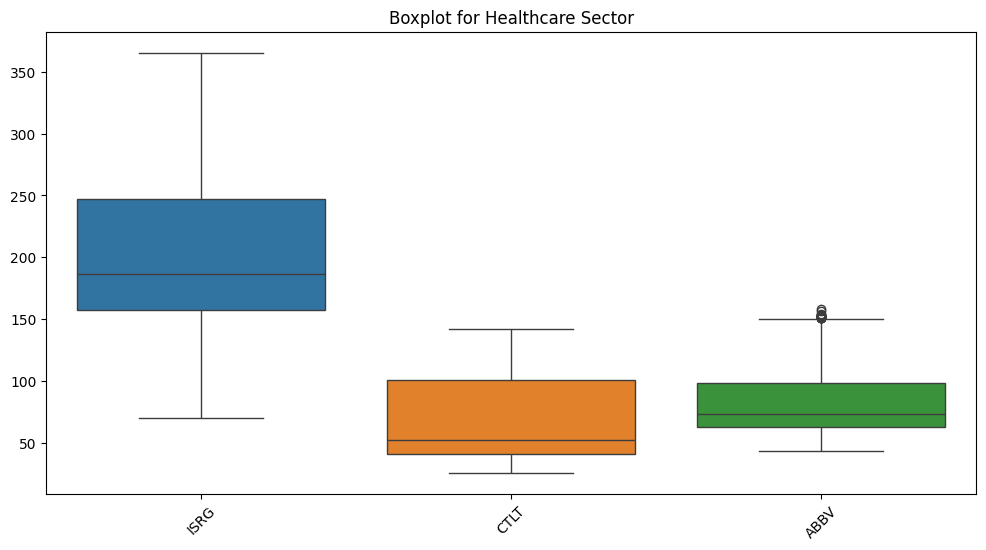

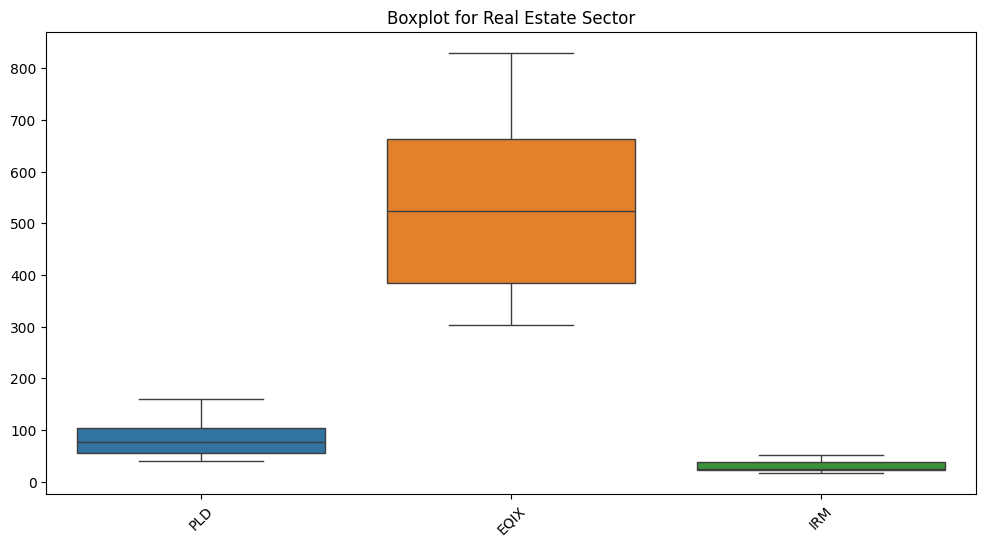

In [ ]:
# ---------------------------
# Detect Outliers
# ---------------------------
def plot_boxplot(data, title):
    """
    Plot a boxplot for detecting outliers in the dataset.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot the boxplot for utilities sector
plot_boxplot(utilities_data, "Boxplot for Utilities Sector")
# Plot the boxplot for healthcare sector
plot_boxplot(healthcare_data, "Boxplot for Healthcare Sector")
# Plot the boxplot for real estate sector
plot_boxplot(real_estate_data, "Boxplot for Real Estate Sector")


###Analyse the box plot:

**Utilities Sector: NEE, SO, XEL**

* Range of Values:
NEE: Exhibits the largest range among the three stocks, indicating higher volatility. Prices range roughly between 30 and 90, with a median near 50.
SO and XEL: Display smaller ranges, suggesting relatively lower volatility compared to NEE. Their medians are close to the lower half of their respective ranges.

* Outlier Analysis:
No significant outliers are detected in this sector, as all data points fall within the whiskers.

* Risk and Return Implications:
Investors considering this sector should note that NEE may offer higher potential returns due to its wider range but also comes with higher risk.
SO and XEL, with narrower ranges, may be more stable options for conservative portfolios.



**Healthcare Sector: ISRG, CTLT, ABBV**

* Range of Values:
ISRG: Exhibits the largest range, with prices between approximately 50 and 350. Its higher median indicates it generally performs better in terms of value compared to other stocks in this sector.
CTLT and ABBV: Have more compressed ranges, with medians closer to the lower bound of their price ranges.

* Outlier Analysis:
ABBV: Displays a few outliers on the upper end, indicating rare instances of price spikes. These outliers may reflect positive market news or other extraordinary events.

* Risk and Return Implications:
ISRG’s wide range suggests it has higher potential returns but also increased risk.
ABBV’s outliers indicate occasional sharp increases, which may attract speculative investors.



**Real Estate Sector: PLD, EQIX, IRM**

* Range of Values:
EQIX: Dominates with a wide range, indicating high volatility and prices spanning between 300 and 800. Its median is approximately 500, suggesting consistent performance in that range.
PLD and IRM: Have much smaller ranges, indicating lower volatility and steadier performance.

*Outlier Analysis:
No significant outliers detected in this sector. All data points fall within the expected range.

* Risk and Return Implications:
EQIX’s broad range and high median suggest a high-return, high-risk profile.
PLD and IRM are more stable, making them suitable for risk-averse investors seeking consistent returns.


###**Step 5: Checking Data Consistency**

In [ ]:
# ---------------------------
# Check for Data Consistency
# ---------------------------

def check_negative_values(data, sector_name):
    """
    Check for negative values in the stock price data for a given sector.
    """
    if (data < 0).any().any():
        print(f"Warning: Negative values detected in {sector_name} sector.")
    else:
        print(f"No negative values in {sector_name} sector.")

# Check for the three sectors in your project
check_negative_values(utilities_data, "Utilities")
check_negative_values(healthcare_data, "Healthcare")
check_negative_values(real_estate_data, "Real Estate")


No negative values in Utilities sector.
No negative values in Healthcare sector.
No negative values in Real Estate sector.


Nice! There is also no negative values.

###**step 6:Time-series visulization for each sector**

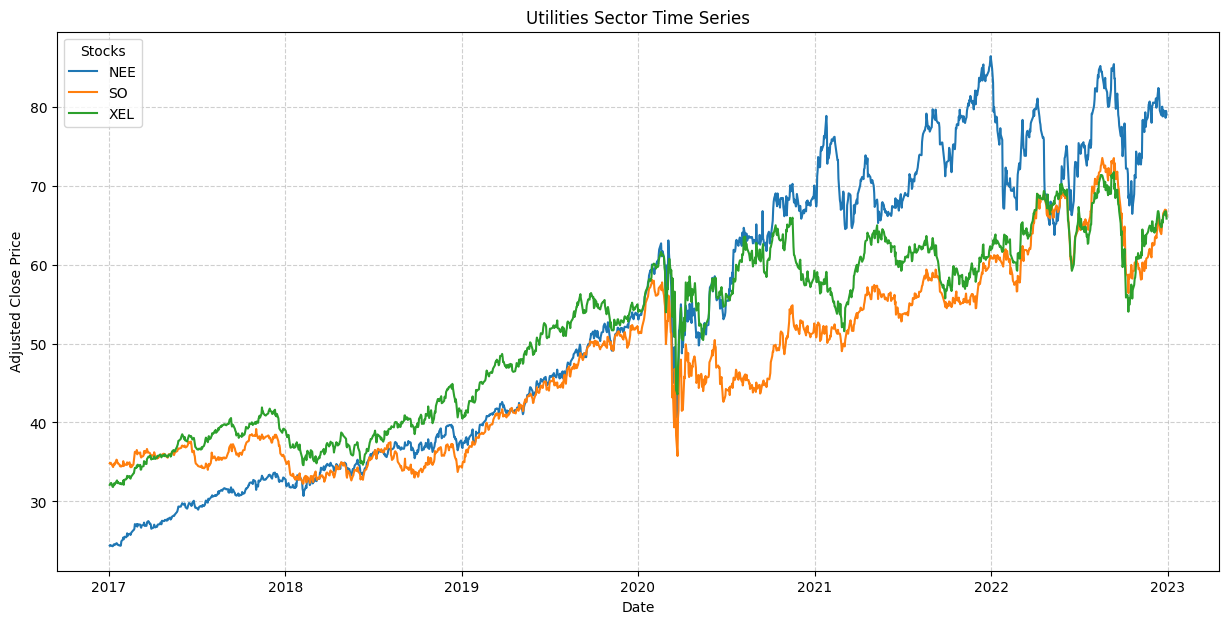

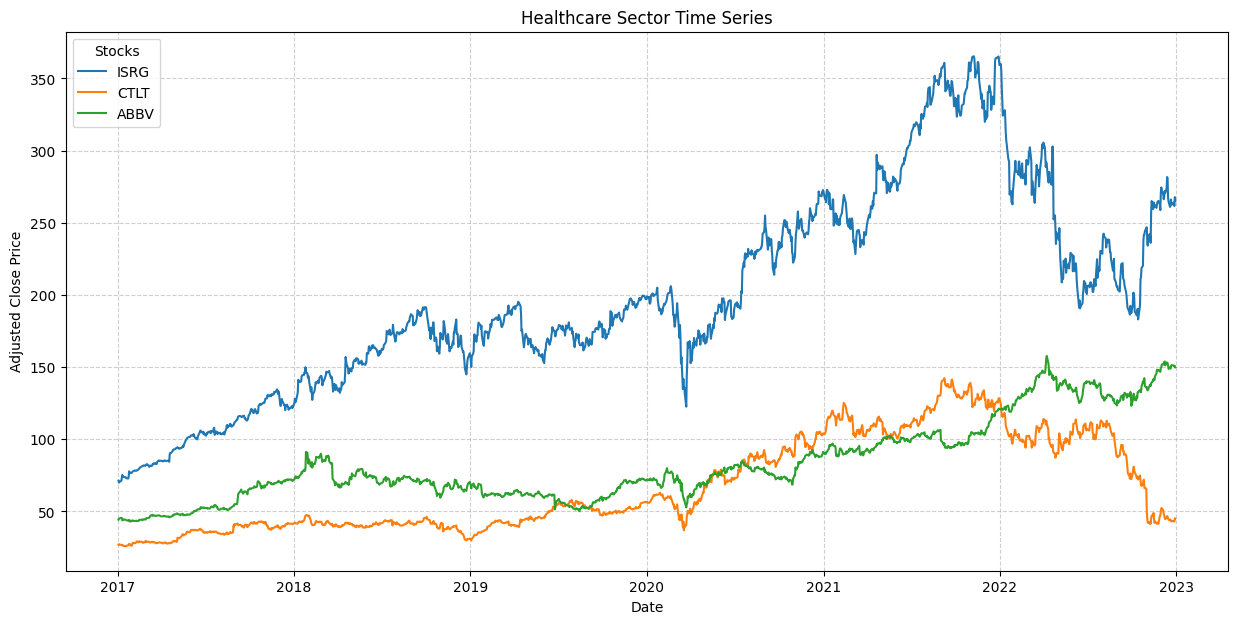

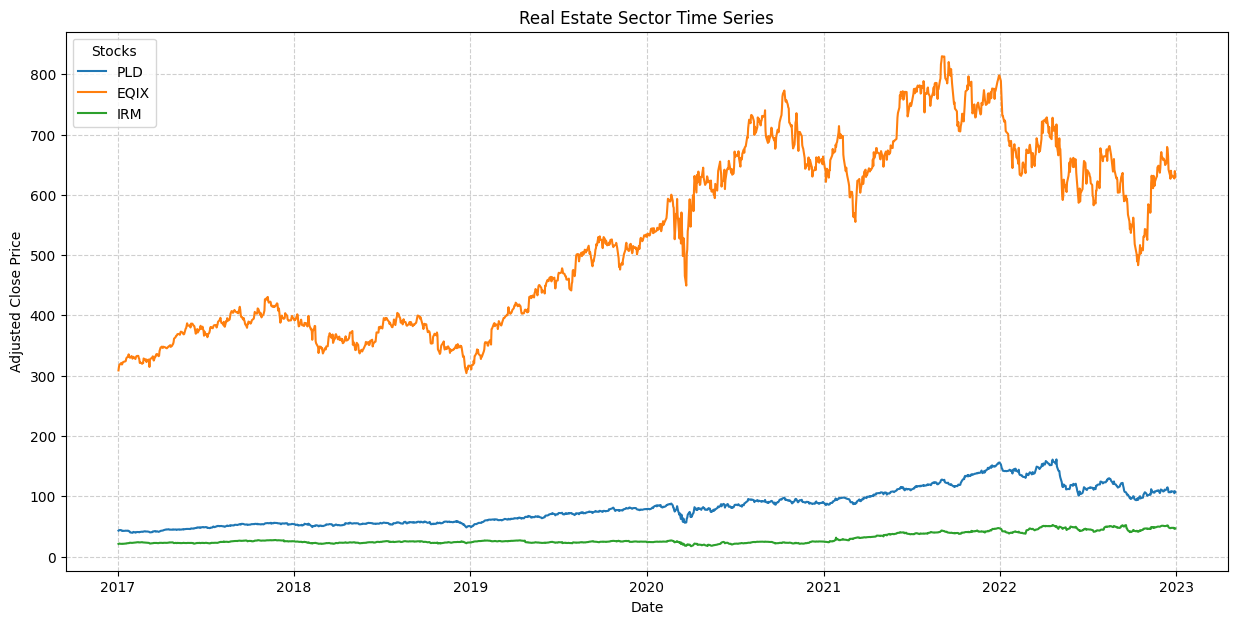

In [ ]:
# Function to plot time series data
def plot_time_series(data, sector_name):
    """
    Plot the time series data for a given sector.

    Parameters:
    data (DataFrame): The DataFrame containing the time series data.
    sector_name (str): The name of the sector being plotted.
    """
    plt.figure(figsize=(15, 7))
    for column in data.columns:
        plt.plot(data.index, data[column], label=column)
    plt.title(f'{sector_name} Sector Time Series')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend(title="Stocks", loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plotting time series data for each sector
plot_time_series(utilities_data, 'Utilities')
plot_time_series(healthcare_data, 'Healthcare')
plot_time_series(real_estate_data, 'Real Estate')


#### **Utilities Sector**
- **Stocks: NEE, SO, XEL**
- **Analysis**:
  - **NEE (NextEra Energy)** shows strong growth over time, reaching its peak in late 2022, highlighting its resilience and strong market position in the utility sector.
  - **SO (Southern Company)** displays steady growth with smaller fluctuations compared to NEE, reflecting a more stable but slower growth pattern.
  - **XEL (Xcel Energy)** has a similar trend to SO, with steady incremental growth and moderate volatility.
  - **Impact of COVID-19**: All three stocks show a dip in early 2020 due to the market crash from the pandemic, but NEE recovered and outperformed others.
  - **Volatility Comparison**: NEE is the most volatile but also the strongest performer, while SO and XEL are less volatile and provide stability to the sector.

---

#### **Healthcare Sector**
- **Stocks: ISRG, CTLT, ABBV**
- **Analysis**:
  - **ISRG (Intuitive Surgical)** dominates the sector in terms of price growth, peaking in 2021, driven by its innovative surgical products. However, it shows increased volatility post-2022.
  - **CTLT (Catalent)** experienced a stable upward trend until 2021, followed by a significant decline starting in late 2022, indicating challenges such as market competition or operational issues.
  - **ABBV (AbbVie)** maintains steady growth with some mild volatility, highlighting its stability. Peaks in mid-2021 could be attributed to successful product launches or favorable market conditions.
  - **Sector Trends**: ISRG reflects high growth potential but also high risk, while ABBV and CTLT show less aggressive but steadier patterns.
  - **COVID-19 Recovery**: All stocks show resilience post-2020, with ISRG and ABBV leading recovery momentum.

---

#### **Real Estate Sector**
- **Stocks: PLD, EQIX, IRM**
- **Analysis**:
  - **PLD (Prologis)** shows steady growth over time, reflecting demand for logistics and warehouse facilities. It displays moderate volatility but strong performance.
  - **EQIX (Equinix)** exhibits the highest price among the three, with significant growth until late 2021, stabilizing post-2022. Its performance reflects strong demand in the data center market.
  - **IRM (Iron Mountain)** remains relatively flat compared to others, highlighting its position as a low-risk, low-growth option in the sector.
  - **Sector Overview**: EQIX reflects aggressive growth with higher volatility, PLD offers moderate growth and risk, while IRM provides stability.
  - **Impact of Market Trends**: EQIX and PLD benefit from the shift toward e-commerce and data reliance, while IRM lags in growth due to its traditional business model.

---

### **Overall Insights**
- The **Utilities Sector** offers steady growth with NEE as a high-performing yet volatile stock.
- The **Healthcare Sector** showcases ISRG’s growth potential but higher risk, while ABBV and CTLT balance stability and moderate growth.
- The **Real Estate Sector** demonstrates varied strategies, with EQIX and PLD leading in growth, while IRM caters to low-risk investors.
- **COVID-19 Impact**: All sectors show significant dips in early 2020 but recover quickly, reflecting sector resilience and adaptability.


# 2 - Optimzation Model

### Step 1: Prepare the data for model.

In [ ]:
# Reuse existing data prepared earlier
close_prices = pd.concat([utilities_data, healthcare_data, real_estate_data], axis=1)

# Calculate daily rate of return
daily_returns = close_prices.pct_change()

# Remove rows with NaN values (e.g., due to missing data at the start)
daily_returns = daily_returns.dropna()

# Display the first few rows to confirm the data
print("Daily Returns (first 5 rows):")
print(daily_returns.head())

# Display summary statistics to verify the data
print("\nSummary Statistics for Daily Returns:")
print(daily_returns.describe())


Daily Returns (first 5 rows):
                 NEE        SO       XEL      ISRG      CTLT      ABBV  \
2017-01-04  0.002948 -0.001020  0.004432 -0.019165  0.011481  0.014100   
2017-01-05 -0.000588  0.003062  0.000000  0.005433 -0.015013  0.007584   
2017-01-06 -0.002941 -0.002645  0.002941  0.005056 -0.000744  0.000314   
2017-01-09 -0.002528 -0.009794 -0.015152  0.008159  0.001116  0.006584   
2017-01-10  0.001943 -0.003091 -0.000248  0.032590 -0.001858 -0.002180   

                 PLD      EQIX       IRM  
2017-01-04  0.017803  0.020044  0.024471  
2017-01-05  0.000372  0.010494  0.002065  
2017-01-06  0.006510  0.002002 -0.014126  
2017-01-09 -0.007577  0.007287 -0.007164  
2017-01-10 -0.022905 -0.008467  0.001203  

Summary Statistics for Daily Returns:
               NEE           SO          XEL         ISRG         CTLT  \
count  1509.000000  1509.000000  1509.000000  1509.000000  1509.000000   
mean      0.000904     0.000543     0.000577     0.001104     0.000650   
std   

In [ ]:
#Mean returns and covariance matrix for MPT optimization
df_mean = daily_returns.mean()
df_cov = daily_returns.cov()

# Display results
print("Daily Returns:")
print(df_mean)

print("\nDaily Covariacne Matrix:")
print(df_cov)


Daily Returns:
NEE     0.000904
SO      0.000543
XEL     0.000577
ISRG    0.001104
CTLT    0.000650
ABBV    0.000956
PLD     0.000765
EQIX    0.000633
IRM     0.000719
dtype: float64

Daily Covariacne Matrix:
           NEE        SO       XEL      ISRG      CTLT      ABBV       PLD  \
NEE   0.000251  0.000179  0.000166  0.000153  0.000135  0.000078  0.000168   
SO    0.000179  0.000237  0.000177  0.000125  0.000099  0.000075  0.000163   
XEL   0.000166  0.000177  0.000202  0.000112  0.000095  0.000071  0.000154   
ISRG  0.000153  0.000125  0.000112  0.000465  0.000262  0.000138  0.000193   
CTLT  0.000135  0.000099  0.000095  0.000262  0.000612  0.000126  0.000189   
ABBV  0.000078  0.000075  0.000071  0.000138  0.000126  0.000291  0.000106   
PLD   0.000168  0.000163  0.000154  0.000193  0.000189  0.000106  0.000314   
EQIX  0.000161  0.000134  0.000138  0.000193  0.000188  0.000082  0.000213   
IRM   0.000136  0.000141  0.000128  0.000156  0.000146  0.000081  0.000199   

          

I have chosen to use daily returns for both the mean and covariance matrix throughout my project to ensure consistency across the MPT optimization model, investment strategies, and Monte Carlo simulation. This approach aligns with the examples provided in class and avoids additional transformations between daily and annual metrics, maintaining uniformity in my analysis.

### **Step 2: Build the Nonlinear Optimization Model.**

In [ ]:
from pyomo.environ import *

# Step 1: Initialize the Pyomo model
m = ConcreteModel()

# Step 2: Define decision variables
# Proportion of the budget allocated to each stock (continuous variable)
# Each variable represents the proportion of the budget allocated to the stock (bounds: 0 to 1)
m.NEE = Var(within=NonNegativeReals, bounds=(0, 1))  # Utilities sector
m.SO = Var(within=NonNegativeReals, bounds=(0, 1))
m.XEL = Var(within=NonNegativeReals, bounds=(0, 1))
m.ISRG = Var(within=NonNegativeReals, bounds=(0, 1))  # Healthcare sector
m.CTLT = Var(within=NonNegativeReals, bounds=(0, 1))
m.ABBV = Var(within=NonNegativeReals, bounds=(0, 1))
m.PLD = Var(within=NonNegativeReals, bounds=(0, 1))  # Real Estate sector
m.EQIX = Var(within=NonNegativeReals, bounds=(0, 1))
m.IRM = Var(within=NonNegativeReals, bounds=(0, 1))

# Binary variables indicating whether a stock is selected in the portfolio
m.NEE_Y = Var(within=Binary)
m.SO_Y = Var(within=Binary)
m.XEL_Y = Var(within=Binary)
m.ISRG_Y = Var(within=Binary)
m.CTLT_Y = Var(within=Binary)
m.ABBV_Y = Var(within=Binary)
m.PLD_Y = Var(within=Binary)
m.EQIX_Y = Var(within=Binary)
m.IRM_Y = Var(within=Binary)

# Print confirmation of variable setup
print("Variables for portfolio allocation and binary selection have been defined.")


Variables for portfolio allocation and binary selection have been defined.


###Objective Functions, Constriants and Linking Constraints

In [ ]:
# Step 3: Define the objective function to maximize expected portfolio returns
# Using `df_mean` as the average return for each stock
m.objective = Objective(
    expr=(
        m.NEE * df_mean['NEE'] +
        m.SO * df_mean['SO'] +
        m.XEL * df_mean['XEL'] +
        m.ISRG * df_mean['ISRG'] +
        m.CTLT * df_mean['CTLT'] +
        m.ABBV * df_mean['ABBV'] +
        m.PLD * df_mean['PLD'] +
        m.EQIX * df_mean['EQIX'] +
        m.IRM * df_mean['IRM']
    ),
    sense=maximize
)

# Step 4: Budget constraint - The sum of all allocations must equal 1
m.budget_constraint = Constraint(
    expr=(
        m.NEE + m.SO + m.XEL +
        m.ISRG + m.CTLT + m.ABBV +
        m.PLD + m.EQIX + m.IRM == 1
    )
)

# Step 5: Sector constraints - At least one stock must be selected from each sector
m.sector_constraints = ConstraintList()
m.sector_constraints.add(m.NEE_Y + m.SO_Y + m.XEL_Y >= 1)  # Utilities
m.sector_constraints.add(m.ISRG_Y + m.CTLT_Y + m.ABBV_Y >= 1)  # Healthcare
m.sector_constraints.add(m.PLD_Y + m.EQIX_Y + m.IRM_Y >= 1)  # Real Estate

# Step 6: Minimum allocation constraints (at least 2% if included)
m.min_alloc = ConstraintList()
for stock, stock_var, stock_bin in [
    ('NEE', m.NEE, m.NEE_Y), ('SO', m.SO, m.SO_Y), ('XEL', m.XEL, m.XEL_Y),
    ('ISRG', m.ISRG, m.ISRG_Y), ('CTLT', m.CTLT, m.CTLT_Y), ('ABBV', m.ABBV, m.ABBV_Y),
    ('PLD', m.PLD, m.PLD_Y), ('EQIX', m.EQIX, m.EQIX_Y), ('IRM', m.IRM, m.IRM_Y)
]:
    m.min_alloc.add(stock_var >= 0.02 * stock_bin)  # Minimum 2% if selected
    m.min_alloc.add(stock_var <= stock_bin)        # Allocation must be 0 if not selected

# Step 7: Maximum allocation constraint (no more than 50% per stock)
m.max_alloc = ConstraintList()
for stock_var in [m.NEE, m.SO, m.XEL, m.ISRG, m.CTLT, m.ABBV, m.PLD, m.EQIX, m.IRM]:
    m.max_alloc.add(stock_var <= 0.5)

# Step 8: Linking constraints to tie allocation proportions to binary selection
m.link_constraints = ConstraintList()
for stock_var, stock_bin in [
    (m.NEE, m.NEE_Y), (m.SO, m.SO_Y), (m.XEL, m.XEL_Y),
    (m.ISRG, m.ISRG_Y), (m.CTLT, m.CTLT_Y), (m.ABBV, m.ABBV_Y),
    (m.PLD, m.PLD_Y), (m.EQIX, m.EQIX_Y), (m.IRM, m.IRM_Y)
]:
    m.link_constraints.add(stock_var <= stock_bin)  # If not selected, allocation must be 0

print("Optimization model with hardcoded constraints is ready.")

Optimization model with hardcoded constraints is ready.


### **Step 3: Risk Calculation Fucntion & Define Risk Level.**

In [ ]:
# Define the function to calculate portfolio risk
def calc_risk(m):
    """
    Calculate portfolio risk based on the covariance matrix for hardcoded stocks.
    """
    # Define the variables associated with the stocks
    variables = m.NEE, m.SO, m.XEL, m.ISRG, m.CTLT, m.ABBV, m.PLD, m.EQIX, m.IRM
    tickers = ["NEE", "SO", "XEL", "ISRG", "CTLT", "ABBV", "PLD", "EQIX", "IRM"]

    # Initialize risk exposure
    risk_exp = 0

    # Calculate the expression for portfolio risk (variance)
    for i in range(len(variables)):
        for j in range(len(variables)):
            # Use the covariance matrix
            risk_exp += variables[i] * df_cov.at[tickers[i], tickers[j]] * variables[j]

    return risk_exp

# Initialize the model 'm' before calling this function

# Assign the risk calculation expression to a variable
expr_risk = calc_risk(m)

# Define the range of risk limits to test in the optimization model
risk_limits = np.linspace(0.00017, 0.00027, 100)  # Adjust based on your data
print("Risk limits:", risk_limits)

Risk limits: [0.00017    0.00017101 0.00017202 0.00017303 0.00017404 0.00017505
 0.00017606 0.00017707 0.00017808 0.00017909 0.0001801  0.00018111
 0.00018212 0.00018313 0.00018414 0.00018515 0.00018616 0.00018717
 0.00018818 0.00018919 0.0001902  0.00019121 0.00019222 0.00019323
 0.00019424 0.00019525 0.00019626 0.00019727 0.00019828 0.00019929
 0.0002003  0.00020131 0.00020232 0.00020333 0.00020434 0.00020535
 0.00020636 0.00020737 0.00020838 0.00020939 0.0002104  0.00021141
 0.00021242 0.00021343 0.00021444 0.00021545 0.00021646 0.00021747
 0.00021848 0.00021949 0.00022051 0.00022152 0.00022253 0.00022354
 0.00022455 0.00022556 0.00022657 0.00022758 0.00022859 0.0002296
 0.00023061 0.00023162 0.00023263 0.00023364 0.00023465 0.00023566
 0.00023667 0.00023768 0.00023869 0.0002397  0.00024071 0.00024172
 0.00024273 0.00024374 0.00024475 0.00024576 0.00024677 0.00024778
 0.00024879 0.0002498  0.00025081 0.00025182 0.00025283 0.00025384
 0.00025485 0.00025586 0.00025687 0.00025788 0.000

### **Step 4: Run the model.**

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# Initialize dictionaries for feasible allocations and returns
param_analysis = {}  # key=risk, value=stock allocations
returns = {}  # key=risk, value=return
infeasible_risk_levels = []  # List to track infeasible risk levels

for r in risk_limits:
    if hasattr(m, 'total_risk'):
        # Add the risk constraint for the current risk limit
        m.del_component(m.total_risk)
    m.total_risk = Constraint(expr=expr_risk <= r)

    # The try block should be aligned with the for loop
    try:
        # Try solving the optimization model
        result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m)

        # Check solver status for infeasibility
        if result.solver.termination_condition == TerminationCondition.infeasible:
            print(f"Risk level {r} is infeasible.")
            infeasible_risk_levels.append(r)
            continue  # Skip to the next risk level

        # Store the allocation proportions for each stock
        param_analysis[r] = [
            m.NEE(), m.SO(), m.XEL(),
            m.ISRG(), m.CTLT(), m.ABBV(),
            m.PLD(), m.EQIX(), m.IRM()
        ]

        # Calculate and store the portfolio return for the current allocation
        returns[r] = (
            m.NEE() * df_mean["NEE"] +
            m.SO() * df_mean["SO"] +
            m.XEL() * df_mean["XEL"] +
            m.ISRG() * df_mean["ISRG"] +
            m.CTLT() * df_mean["CTLT"] +
            m.ABBV() * df_mean["ABBV"] +
            m.PLD() * df_mean["PLD"] +
            m.EQIX() * df_mean["EQIX"] +
            m.IRM() * df_mean["IRM"]
        )

    except Exception as e:
        # Handle exceptions for infeasible or solver-related issues
        print(f"Risk level {r} caused an error: {e}")
        infeasible_risk_levels.append(r)

# Display results
print("Feasible Allocations:")
print(param_analysis)

print("\nReturns for Each Feasible Risk Level:")
print(returns)

print("\nInfeasible Risk Levels:")
print(infeasible_risk_levels)

Feasible Allocations:
{0.00017: [0.39845263897396593, 0.0, 0.0, 0.1627395044975911, 0.0, 0.3907263087363506, 0.0, 0.0, 0.04808154839896003], 0.00017101010101010103: [0.3986627635047511, 0.0, 0.0, 0.1691914953911606, 0.0, 0.39166062286721726, 0.0, 0.0, 0.04048511878772734], 0.00017202020202020202: [0.39885913047603166, 0.0, 0.0, 0.1753362182984156, 0.0, 0.39254893095315824, 0.0, 0.0, 0.03325572079215531], 0.00017303030303030304: [0.39904240619565634, 0.0, 0.0, 0.18121497708978232, 0.0, 0.3933973012232444, 0.0, 0.0, 0.02634531573582215], 0.00017404040404040406: [0.4109423765733685, 0.0, 0.0, 0.17219460795236746, 0.0, 0.3968469266895186, 0.020016088785713173, 0.0, 7.561492419516048e-14], 0.00017505050505050505: [0.3888480668271525, 0.0, 0.0, 0.19880973182821088, 0.0, 0.39230649697820025, 0.0, 0.0, 0.020035706476708694], 0.00017606060606060607: [0.37990668657682436, 0.0, 0.0, 0.2093904430367387, 0.0, 0.3907001048792342, 0.0, 0.0, 0.020002765732155828], 0.0001770707070707071: [0.37157907123

### **Step 5: Parameter Analysis**

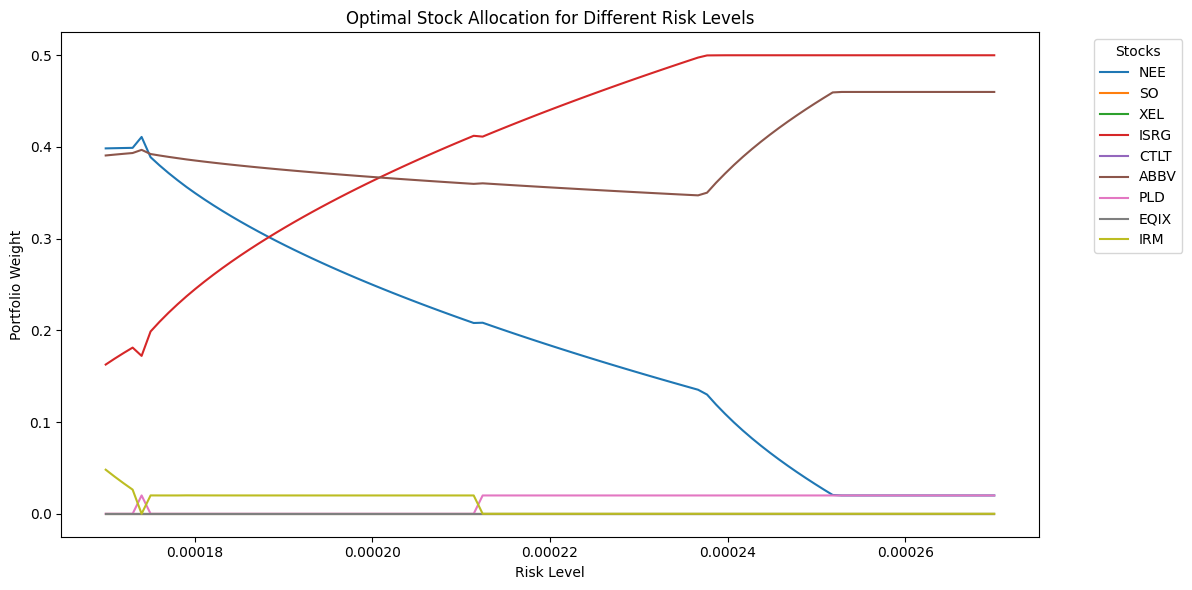

In [ ]:
# Generating the dataframe for proportions of the portfolio for each risk limit
param_analysis_df = pd.DataFrame.from_dict(param_analysis, orient='index')

# Rename columns to reflect your stock tickers
param_analysis_df.columns = ["NEE", "SO", "XEL", "ISRG", "CTLT", "ABBV", "PLD", "EQIX", "IRM"]

# Plot the portfolio proportions for different risk levels
param_analysis_df.plot(figsize=(12, 6))
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xlabel('Risk Level')  # X-axis label
plt.ylabel('Portfolio Weight')  # Y-axis label
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.tight_layout()
plt.show()


In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.00017, 0.00017101010101010103, 0.00017202020202020202, 0.00017303030303030304, 0.00017404040404040406, 0.00017505050505050505, 0.00017606060606060607, 0.0001770707070707071, 0.00017808080808080808, 0.0001790909090909091, 0.00018010101010101012, 0.0001811111111111111, 0.00018212121212121213, 0.00018313131313131315, 0.00018414141414141417, 0.00018515151515151516, 0.00018616161616161618, 0.00018717171717171717, 0.0001881818181818182, 0.0001891919191919192, 0.00019020202020202023, 0.00019121212121212122, 0.00019222222222222224, 0.00019323232323232325, 0.00019424242424242425, 0.00019525252525252526, 0.00019626262626262628, 0.00019727272727272728, 0.0001982828282828283, 0.0001992929292929293, 0.0002003030303030303, 0.00020131313131313132, 0.00020232323232323234, 0.00020333333333333336, 0.00020434343434343435, 0.00020535353535353537, 0.00020636363636363636, 0.00020737373737373738, 0.0002083838383838384, 0.00020939393939393942, 0.0002104040404040404, 0.00021141414141414143, 0.00021242424242

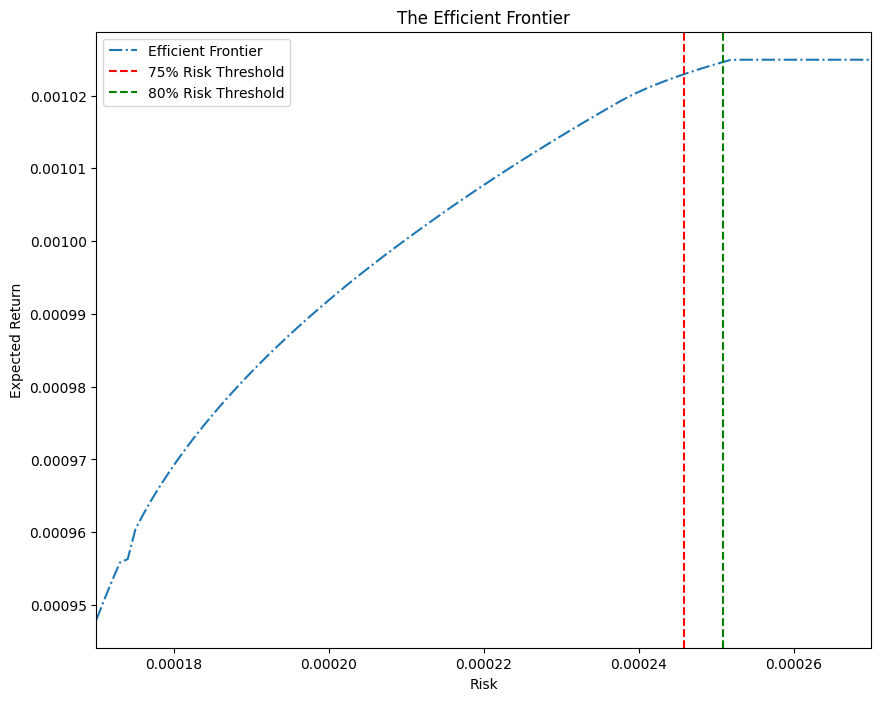

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(risk, reward, '-.', label='Efficient Frontier')  # Draw an effecient frontier curve
plt.title('The Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Return')

# According to the data of risk and reward to set the index
twenty_five_percent_index = int(len(risk) * 0.75)

# Draw a 100% minus 25% risk threshold line
plt.axvline(x=risk[twenty_five_percent_index], color='red', linestyle='--', label='75% Risk Threshold')

# Draw a 80% risk threshold line
# We can simply view from the figure to ensure that at least 80% of risk level data is visualized
eighty_percent_line = int(len(risk) * 0.8)
plt.axvline(x=risk[eighty_percent_line], color='green', linestyle='--', label='80% Risk Threshold')

# Show the whole risk level data
plt.xlim(left=risk[0], right=risk[int(len(risk)) - 1])

# Show legend
plt.legend()

# Show the plot!
plt.show()

In [ ]:
import numpy as np
import pandas as pd
# Convert param_analysis dictionary to a DataFrame
param_analysis_df = pd.DataFrame.from_dict(param_analysis, orient='index')

# Assign stock tickers as column names
param_analysis_df.columns = ["NEE", "SO", "XEL", "ISRG", "CTLT", "ABBV", "PLD", "EQIX", "IRM"]

# Select a moderate risk level
selected_risk_level = risk[len(risk) // 2]  # Middle risk level
print(f"Selected Risk Level: {selected_risk_level}")

# Extract the portfolio allocation for the selected risk level
final_portfolio_allocation = param_analysis_df.loc[selected_risk_level]
print("\nFinal Portfolio Allocation (Raw):")
print(final_portfolio_allocation)

# Normalize the allocations to ensure they sum up to 100%
final_portfolio_allocation = final_portfolio_allocation / final_portfolio_allocation.sum() * 100
print("\nNormalized Portfolio Allocation (Sum to 100%):")
print(final_portfolio_allocation)

# Validate the allocations
if final_portfolio_allocation.max() > 50:
    print("Warning: Maximum allocation exceeds 50% for a stock!")
if len(final_portfolio_allocation[final_portfolio_allocation > 0]) < 3:
    print("Warning: Portfolio does not contain at least three stocks!")
if abs(final_portfolio_allocation.sum() - 100) > 1e-6:
    print("Warning: Allocations do not sum up to 100%!")

# Prepare the final allocation as a dictionary for use in Part 3
final_portfolio_dict = final_portfolio_allocation.to_dict()
# Filter out stocks with zero allocation
final_portfolio_dict = {stock: allocation for stock, allocation in final_portfolio_dict.items() if allocation > 0}
print("\nFinal Portfolio Allocation (Dictionary):")
print(final_portfolio_dict)

# Output example for visualization or use in Part 3
print("\nSelected Portfolio Allocation for Investment Strategies:")
for stock, allocation in final_portfolio_dict.items():
    print(f"{stock}: {allocation:.2f}%")


Selected Risk Level: 0.00022050505050505052

Final Portfolio Allocation (Raw):
NEE     0.182078
SO      0.000000
XEL     0.000000
ISRG    0.442283
CTLT    0.000000
ABBV    0.355639
PLD     0.020000
EQIX    0.000000
IRM     0.000000
Name: 0.00022050505050505052, dtype: float64

Normalized Portfolio Allocation (Sum to 100%):
NEE     18.207779
SO       0.000000
XEL      0.000000
ISRG    44.228320
CTLT     0.000000
ABBV    35.563896
PLD      2.000004
EQIX     0.000000
IRM      0.000000
Name: 0.00022050505050505052, dtype: float64

Final Portfolio Allocation (Dictionary):
{'NEE': 18.207779411575434, 'ISRG': 44.22831985850131, 'ABBV': 35.56389646845715, 'PLD': 2.0000042614661164}

Selected Portfolio Allocation for Investment Strategies:
NEE: 18.21%
ISRG: 44.23%
ABBV: 35.56%
PLD: 2.00%


# 3 - Investment Strategy

In [ ]:
from yahoo_fin.stock_info import get_data
import pandas as pd

# Automatically extract selected stocks from the final portfolio allocation
# Only include stocks with non-zero allocations
selected_stocks = [stock for stock, allocation in final_portfolio_dict.items() if allocation > 0]

# Date range for fetching stock data
start_date = '2023-01-01'
end_date = '2023-12-31'

# Dictionary to store the 2023 stock data for each selected stock
stock_data_2023 = {}

# Fetch historical stock data for each selected stock
for stock in selected_stocks:
    try:
        print(f"Fetching data for {stock}...")
        stock_data_2023[stock] = get_data(stock, start_date=start_date, end_date=end_date, index_as_date=True)['adjclose']
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")

# Convert the dictionary into a DataFrame for further analysis
stock_data_2023_df = pd.DataFrame(stock_data_2023)

# Print summary of the fetched data
print("\nFetched 2023 Stock Data (Adjusted Closing Prices):")
print(stock_data_2023_df.head())

# Save data to a CSV file for backup and offline usage
stock_data_2023_df.to_csv("selected_stocks_2023_data.csv")


Fetching data for NEE...
Fetching data for ISRG...
Fetching data for ABBV...
Fetching data for PLD...

Fetched 2023 Stock Data (Adjusted Closing Prices):
                  NEE        ISRG        ABBV         PLD
2023-01-03  79.221115  265.630005  150.570770  107.068451
2023-01-04  79.844833  270.000000  151.785492  111.125443
2023-01-05  78.087097  268.619995  151.600037  107.220474
2023-01-06  79.051010  270.390015  154.437485  110.830902
2023-01-09  79.447922  264.929993  149.903122  110.270348


##3.1 Buy and Hold Strategy

In [ ]:
# Buy-and-Hold Strategy
initial_investment = 100000  # $100,000

# Calculate the dollar allocation for each stock based on initial allocation
dollar_allocation = {stock: (allocation / 100) * initial_investment for stock, allocation in final_portfolio_dict.items()}

# Calculate the number of fractional shares purchased for each stock
first_day_prices = stock_data_2023_df.iloc[0]  # First trading day of 2023
shares = {stock: dollar_allocation[stock] / first_day_prices[stock] for stock in selected_stocks}

# Prepare a DataFrame to store portfolio value and returns for each month-end
buy_hold_results = []

# Iterate through each month-end and calculate portfolio value and returns
month_ends = stock_data_2023_df.resample('ME').last()  # Get last trading day of each month
for date, prices in month_ends.iterrows():
    portfolio_value = sum(shares[stock] * prices[stock] for stock in selected_stocks)
    stock_returns = {stock: ((prices[stock] / first_day_prices[stock]) - 1) * 100 for stock in selected_stocks}
    portfolio_return = ((portfolio_value / initial_investment) - 1) * 100

    # Append the results
    buy_hold_results.append({
        'Date': date,
        'Portfolio Value': portfolio_value,
        **stock_returns,
        'Total Return (%)': portfolio_return
    })

# Convert results to a DataFrame for display
buy_hold_df = pd.DataFrame(buy_hold_results)
print("Buy-and-Hold Results:")
print(buy_hold_df)

# Add a Summary Table
initial_investment = 100000
final_value = float(buy_hold_df.iloc[-1]['Portfolio Value'])
overall_return = ((final_value / initial_investment) - 1) * 100
print("\nBuy-and-Hold Summary:")
print(f"Initial Investment: ${initial_investment:,.2f}")
print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Overall Portfolio Return: {overall_return:.2f}%")
print('=================================================')

# Save for plotting and analysis
buy_hold_df.to_csv("buy_hold_results.csv", index=False)


Buy-and-Hold Results:
         Date  Portfolio Value        NEE       ISRG       ABBV        PLD  \
0  2023-01-31     92079.527179 -10.974588  -7.506683  -8.144779  14.721795   
1  2023-02-28     89938.649590 -14.721693 -13.643039  -4.321376   9.503960   
2  2023-03-31     96853.497255  -7.458076  -3.824870  -0.920711  11.528177   
3  2023-04-30    102864.559695  -7.998347  13.398334  -5.185378  11.957238   
4  2023-05-31    100427.963057 -11.238223  15.890521 -13.442137  11.331536   
5  2023-06-30    105529.202582 -10.344069  28.727928 -15.468692  10.400846   
6  2023-07-31    106132.430855 -11.431536  22.124755  -5.111187  12.309441   
7  2023-08-31    102251.807775 -18.726308  17.712603  -6.773218  11.814282   
8  2023-09-30     97022.184441 -30.296851  10.036518  -5.441058   1.731841   
9  2023-10-31     90572.400017 -29.068013  -1.283742  -9.543449  -8.658017   
10 2023-11-30     99352.634299 -28.233231  17.019911  -8.768160   4.197845   
11 2023-12-31    107481.394374 -25.497969 

<ipython-input-32-7e81dda26129>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(shares[stock] * prices[stock] for stock in selected_stocks)


##3.2 Reabalancing Strategy

Generalized Function for Rebalancing

In [ ]:
# def rebalance_portfolio(prices, portfolio_allocation, investment=100000):
#     """
#     Rebalance portfolio based on prices and original allocation.
#     """
#     # Reallocate funds equally to match initial portfolio weights
#     dollar_allocation = {stock: (portfolio_allocation[stock] / 100) * investment for stock in portfolio_allocation}
#     shares = {stock: dollar_allocation[stock] / prices[stock] for stock in portfolio_allocation}
#     portfolio_value = sum(shares[stock] * prices[stock] for stock in portfolio_allocation)
#     return portfolio_value, shares

def rebalance_portfolio(prices, portfolio_allocation, investment=100000):
    """
    Rebalance portfolio based on prices and original allocation.
    Args:
        prices: Stock prices on a given date.
        portfolio_allocation: A dictionary of portfolio weights (percentages).
        investment: Total current value of the portfolio.

    Returns:
        portfolio_value: The recalculated value of the portfolio after rebalancing.
        shares: The number of shares held for each stock.
    """
    # Calculate the dollar allocation for each stock based on the portfolio allocation
    dollar_allocation = {stock: (portfolio_allocation[stock] / 100) * investment for stock in portfolio_allocation}

    # Calculate the number of shares for each stock
    shares = {stock: dollar_allocation[stock] / prices[stock] for stock in portfolio_allocation}

    # Calculate the new portfolio value based on current prices
    portfolio_value = sum(shares[stock] * prices[stock] for stock in portfolio_allocation)

    return portfolio_value, shares


###3.2.1 Daily Rebalancing

In [ ]:
# Daily Rebalancing
daily_results = []
investment = initial_investment  # Start with the initial investment value
_, shares = rebalance_portfolio(stock_data_2023_df.iloc[0], final_portfolio_dict, investment)

# Iterate through daily prices and rebalance
for date, prices in stock_data_2023_df.iterrows():
    investment = sum(shares[stock] * prices[stock] for stock in final_portfolio_dict)
    portfolio_value, shares = rebalance_portfolio(prices, final_portfolio_dict, investment)
    returns = {stock: (prices[stock] / stock_data_2023_df.iloc[0][stock] - 1) * 100 for stock in final_portfolio_dict}
    daily_results.append({
        'Date': date,
        'Portfolio Value': portfolio_value,
        'Stock Returns (%)': returns,
        'Total Return (%)': (portfolio_value / initial_investment - 1) * 100
    })

# Create DataFrame to store daily rebalancing results
daily_df = pd.DataFrame(daily_results)
print("Daily Rebalancing Results:")
# print(daily_df)
print('=================================================')
# Summarize Daily Rebalancing Results
initial_investment = 100000  # Initial investment amount
final_value = daily_df.iloc[-1]['Portfolio Value']  # Portfolio value on the last day
overall_return = ((final_value / initial_investment) - 1) * 100  # Overall portfolio return in percentage

# Display the summary
print("Daily Rebalancing Summary:")
print(f"Initial Investment: ${initial_investment:,.2f}")
print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Overall Portfolio Return: {overall_return:.2f}%")
print('=================================================')



Daily Rebalancing Results:
Daily Rebalancing Summary:
Initial Investment: $100,000.00
Final Portfolio Value: $107,348.02
Overall Portfolio Return: 7.35%


<ipython-input-258-054a613e7c1d>:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(shares[stock] * prices[stock] for stock in portfolio_allocation)
<ipython-input-270-51c7e4ca7f23>:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  investment = sum(shares[stock] * prices[stock] for stock in final_portfolio_dict)


### 3.2.2 Weekly Rebalancing

In [ ]:

weekly_results = []
week_ends = stock_data_2023_df.resample('W-FRI').last()
investment = initial_investment
_, shares = rebalance_portfolio(week_ends.iloc[0], final_portfolio_dict, investment)

for date, prices in week_ends.iterrows():
    investment = sum(shares[stock] * prices[stock] for stock in final_portfolio_dict)
    portfolio_value, shares = rebalance_portfolio(prices, final_portfolio_dict, investment)
    returns = {stock: (prices[stock] / week_ends.iloc[0][stock] - 1) * 100 for stock in final_portfolio_dict}
    weekly_results.append({
        'Date': date,
        'Portfolio Value': portfolio_value,
        'Stock Returns (%)': returns,
        'Total Return (%)': (portfolio_value / initial_investment - 1) * 100
    })

weekly_df = pd.DataFrame(weekly_results)
print("Weekly Rebalancing Results:")
# print(weekly_df)
print('=================================================')
# Summarize Weekly Rebalancing Results
initial_investment = 100000  # Initial investment amount
final_value = weekly_df.iloc[-1]['Portfolio Value']  # Portfolio value on the last week
overall_return = ((final_value / initial_investment) - 1) * 100  # Overall portfolio return in percentage

# Display the summary
print("Weekly Rebalancing Summary:")
print(f"Initial Investment: ${initial_investment:,.2f}")
print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Overall Portfolio Return: {overall_return:.2f}%")
print('=================================================')


Weekly Rebalancing Results:
Weekly Rebalancing Summary:
Initial Investment: $100,000.00
Final Portfolio Value: $105,790.68
Overall Portfolio Return: 5.79%


<ipython-input-258-054a613e7c1d>:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(shares[stock] * prices[stock] for stock in portfolio_allocation)
<ipython-input-272-f31de5cc6660>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  investment = sum(shares[stock] * prices[stock] for stock in final_portfolio_dict)


###3.2.3  Monthly Rebalancing

In [ ]:
monthly_results = []
investment = initial_investment  # Start with the initial investment value
month_ends = stock_data_2023_df.resample('M').last()  # Get the last trading day of each month
_, shares = rebalance_portfolio(month_ends.iloc[0], final_portfolio_dict, investment)

# Iterate through monthly prices and rebalance
for date, prices in month_ends.iterrows():
    investment = sum(shares[stock] * prices[stock] for stock in final_portfolio_dict)
    portfolio_value, shares = rebalance_portfolio(prices, final_portfolio_dict, investment)
    returns = {stock: (prices[stock] / month_ends.iloc[0][stock] - 1) * 100 for stock in final_portfolio_dict}
    monthly_results.append({
        'Date': date,
        'Portfolio Value': portfolio_value,
        'Stock Returns (%)': returns,
        'Total Return (%)': (portfolio_value / initial_investment - 1) * 100
    })

# Create DataFrame to store monthly rebalancing results
monthly_df = pd.DataFrame(monthly_results)
print("Monthly Rebalancing Results:")
# print(monthly_df)
print('=================================================')
# Summarize Monthly Rebalancing Results
initial_investment = 100000  # Initial investment amount
final_value = monthly_df.iloc[-1]['Portfolio Value']  # Portfolio value at the end of the last month
overall_return = ((final_value / initial_investment) - 1) * 100  # Overall portfolio return in percentage

# Display the summary
print("Monthly Rebalancing Summary:")
print(f"Initial Investment: ${initial_investment:,.2f}")
print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Overall Portfolio Return: {overall_return:.2f}%")
print('=================================================')


Monthly Rebalancing Results:
Monthly Rebalancing Summary:
Initial Investment: $100,000.00
Final Portfolio Value: $116,855.30
Overall Portfolio Return: 16.86%


<ipython-input-271-3f430bf55a14>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ends = stock_data_2023_df.resample('M').last()  # Get the last trading day of each month
<ipython-input-258-054a613e7c1d>:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(shares[stock] * prices[stock] for stock in portfolio_allocation)
<ipython-input-271-3f430bf55a14>:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  investment = sum(shares[stock] * prices[stock] for stock in final_portfolio_dict)


## 3.3 Visualization of 4 Strategies compared together!

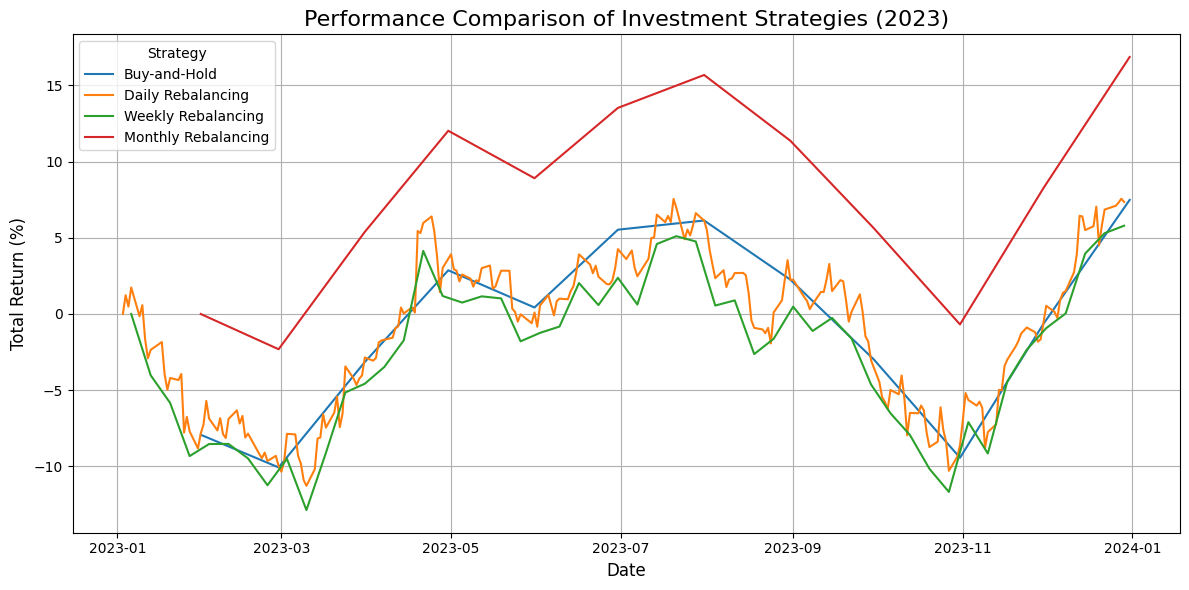

In [ ]:
import matplotlib.pyplot as plt

# Combine data from all strategies
buy_hold_df['Strategy'] = 'Buy-and-Hold'
daily_df['Strategy'] = 'Daily Rebalancing'
weekly_df['Strategy'] = 'Weekly Rebalancing'
monthly_df['Strategy'] = 'Monthly Rebalancing'

# Concatenate all data
all_results = pd.concat([buy_hold_df[['Date', 'Total Return (%)', 'Strategy']],
                         daily_df[['Date', 'Total Return (%)', 'Strategy']],
                         weekly_df[['Date', 'Total Return (%)', 'Strategy']],
                         monthly_df[['Date', 'Total Return (%)', 'Strategy']]])

# Convert dates to datetime format
all_results['Date'] = pd.to_datetime(all_results['Date'])

# Plot the data
plt.figure(figsize=(12, 6))
for strategy in all_results['Strategy'].unique():
    strategy_data = all_results[all_results['Strategy'] == strategy]
    plt.plot(strategy_data['Date'], strategy_data['Total Return (%)'], label=strategy)

# Add labels, title, legend, and grid
plt.title('Performance Comparison of Investment Strategies (2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Return (%)', fontsize=12)
plt.legend(title='Strategy', fontsize=10, loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig("investment_strategy_comparison.png")

# Show the plot
plt.show()



 ### **Analysis of Investment Strategies Performance**


### **Key Observations:**

1. **Buy-and-Hold Strategy**:
   - This strategy shows a relatively **stable and steady trend** throughout the year.
   - While it doesn't achieve the highest peaks, it avoids extreme losses during periods of market downturns.
   - This makes it a **low-maintenance, reliable approach** for investors who prefer to minimize transaction costs and effort.

2. **Daily Rebalancing**:
   - The **most volatile strategy**, closely tracking short-term market fluctuations.
   - It tends to magnify both gains and losses due to frequent rebalancing, which reacts immediately to daily price changes.
   - Although it underperforms in several periods, it eventually converges with the Buy-and-Hold strategy by the end of the year, showcasing **resilience despite high costs**.

3. **Weekly Rebalancing**:
   - This strategy provides a **middle ground between daily and monthly rebalancing** in terms of performance and volatility.
   - It aligns closely with the Buy-and-Hold strategy for most of the year but suffers sharper declines during certain periods, such as late Q3 and early Q4.
   - Its moderate frequency can appeal to investors seeking a balance between **risk and effort**.

4. **Monthly Rebalancing**:
   - This strategy **outperforms all others**, especially during the middle and later parts of the year.
   - Its ability to capture broader market trends while avoiding overreaction to daily fluctuations makes it a **highly efficient approach**.
   - It achieves a significant positive return by the end of the year, demonstrating that **less frequent rebalancing can still lead to superior results** under favorable market conditions.

---

### **Our Insights and Opinion**:

1. **Performance Trends**:
   - Monthly Rebalancing stands out as the most effective strategy, likely due to its ability to combine **long-term trend capture** with **transaction cost minimization**.
   - Daily Rebalancing, although theoretically nimble, suffers from high volatility and costs, which may not be justified by its eventual convergence with Buy-and-Hold.

2. **Strategic Suitability**:
   - For **active investors** looking for greater control, Weekly or Monthly Rebalancing offers an attractive balance between effort and performance.
   - For **passive investors** or those concerned about transaction costs, Buy-and-Hold remains a solid choice.
   - Daily Rebalancing seems impractical for most individual investors due to its high volatility and the frequent costs involved.

3. **Recommendation**:
   - Based on this analysis, I would advocate for the **Monthly Rebalancing strategy**, especially for portfolios like this one where market trends are dominant and transaction costs can impact overall returns. However, for more conservative or passive investors, sticking to Buy-and-Hold may still be a reasonable approach.

# 4 - Monte Carlo Analysis

Daily Mean Returns (for selected stocks):
3.699364161076962e-06

Daily Standard Deviations (for selected stocks):
[0.00099873 0.00135809 0.00107529 0.00111595]


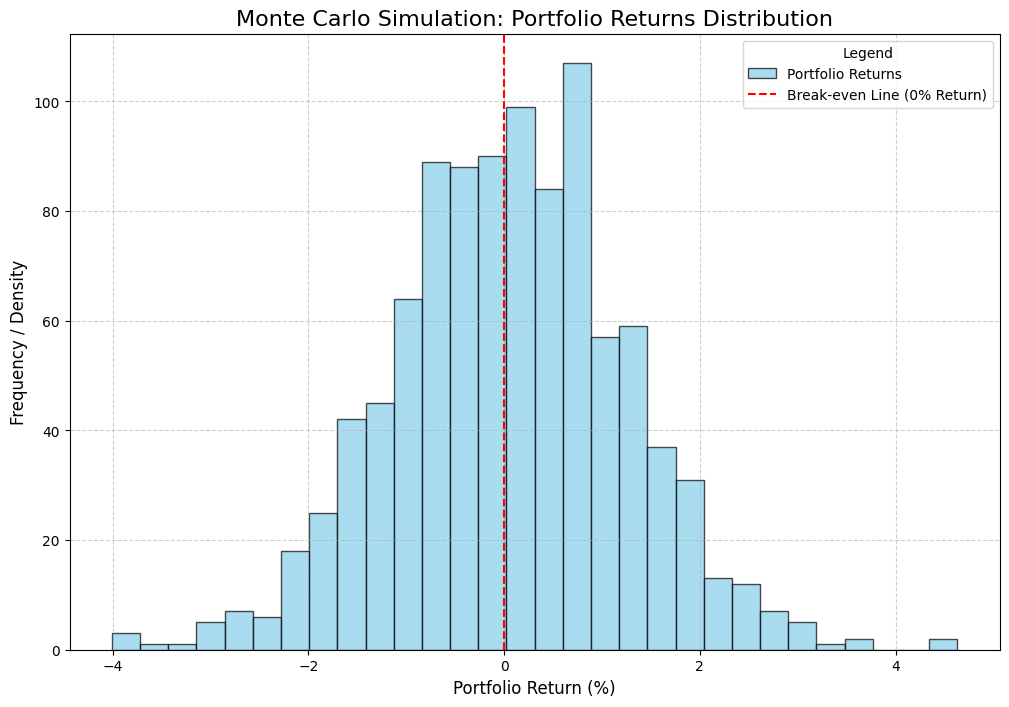


Monte Carlo Simulation Results:
Total Simulations: 1000
Probability of Losing Money: 47.70%
Mean Expected Portfolio Return: 0.06%
Standard Deviation of Portfolio Returns: 1.19%
Minimum Portfolio Return: -4.01%
Maximum Portfolio Return: 4.63%
25th Percentile Portfolio Return: -0.73%
50th Percentile (Median) Portfolio Return: 0.07%
75th Percentile Portfolio Return: 0.83%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Extract Selected Portfolio Allocation
# ---------------------------

# Define the selected portfolio allocation from Part 2
final_portfolio_allocation = final_portfolio_allocation / final_portfolio_allocation.sum() * 100  # Ensure normalization
final_portfolio_dict = {stock: allocation for stock, allocation in final_portfolio_allocation.items() if allocation > 0}
selected_stocks = list(final_portfolio_dict.keys())  # Stocks with non-zero allocation
selected_allocation = pd.Series(final_portfolio_dict)

# ---------------------------
# 2. Set Parameters for Monte Carlo Simulation
# ---------------------------

# Number of simulations
n_simulations = 1000  # Simulate 1000 annual performances

# Number of trading days in a year (2023 has 252 trading days)
n_trading_days = 252

# Filter returns and covariance matrix for selected stocks
filtered_returns = df_mean[selected_stocks]  # Historical returns (2017-2022)
filtered_covariance = df_cov.loc[selected_stocks, selected_stocks]  # Covariance matrix

# Calculate daily mean return and standard deviation for selected stocks
daily_mean = filtered_returns.mean() / 252  # Annual mean to daily mean
daily_std = np.sqrt(np.diag(filtered_covariance)) / np.sqrt(252)  # Annual std to daily std

# Verify shapes and inputs
print("Daily Mean Returns (for selected stocks):")
print(daily_mean)

print("\nDaily Standard Deviations (for selected stocks):")
print(daily_std)

# ---------------------------
# 3. Monte Carlo Simulation of Portfolio Returns
# ---------------------------

# Initialize results storage
portfolio_returns = []

# Run Monte Carlo simulations
for simulation in range(n_simulations):
    # Simulate daily returns for selected stocks (sample from normal distribution)
    simulated_daily_returns = np.random.normal(
        loc=daily_mean,  # Mean
        scale=daily_std,  # Standard deviation
        size=(n_trading_days, len(selected_stocks))  # Shape: (252 days, number of selected stocks)
    )

    # Calculate portfolio daily returns based on the final allocation
    portfolio_daily_returns = simulated_daily_returns.dot(selected_allocation.values / 100)  # Use weights from allocation

    # Calculate the total annual return for the portfolio
    annual_portfolio_return = np.prod(1 + portfolio_daily_returns) - 1  # Compound returns
    portfolio_returns.append(annual_portfolio_return)

# Convert portfolio returns to a NumPy array for analysis
portfolio_returns = np.array(portfolio_returns)

# ---------------------------
# 4. Probability of Loss
# ---------------------------

# Calculate the probability that the portfolio will lose money
probability_of_loss = (portfolio_returns < 0).mean()

# ---------------------------
# 5. Plot Density of Portfolio Returns
# ---------------------------

plt.figure(figsize=(12, 8))
# Plot histogram of portfolio returns
plt.hist(portfolio_returns * 100, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Portfolio Returns')
# Add a vertical line at the break-even point
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='Break-even Line (0% Return)')
# Add title and labels
plt.title("Monte Carlo Simulation: Portfolio Returns Distribution", fontsize=16)
plt.xlabel("Portfolio Return (%)", fontsize=12)
plt.ylabel("Frequency / Density", fontsize=12)
# Add legend
plt.legend(title="Legend", fontsize=10)
# Add grid
plt.grid(True, linestyle='--', alpha=0.6)
# Show the plot
plt.show()

# ---------------------------
# 6. Report Results in a Text Block
# ---------------------------

print("\nMonte Carlo Simulation Results:")
print(f"Total Simulations: {n_simulations}")
print(f"Probability of Losing Money: {probability_of_loss * 100:.2f}%")
print(f"Mean Expected Portfolio Return: {np.mean(portfolio_returns) * 100:.2f}%")
print(f"Standard Deviation of Portfolio Returns: {np.std(portfolio_returns) * 100:.2f}%")
print(f"Minimum Portfolio Return: {np.min(portfolio_returns) * 100:.2f}%")
print(f"Maximum Portfolio Return: {np.max(portfolio_returns) * 100:.2f}%")
print(f"25th Percentile Portfolio Return: {np.percentile(portfolio_returns, 25) * 100:.2f}%")
print(f"50th Percentile (Median) Portfolio Return: {np.percentile(portfolio_returns, 50) * 100:.2f}%")
print(f"75th Percentile Portfolio Return: {np.percentile(portfolio_returns, 75) * 100:.2f}%")



The **Monte Carlo Simulation: Portfolio Returns Distribution** reveals a near-symmetric distribution centered slightly above 0%, with most portfolio returns falling between -4% and +4%. The red dashed line at 0% (break-even point) highlights that a significant portion of the returns are negative, indicating the possibility of losses. On average, the portfolio shows a mean return of +0.06%, reflecting marginal profitability, while the probability of losing money is relatively high at 47.70%. The portfolio’s standard deviation of 1.19% suggests low variability, which highlights its stability.

The range of returns spans from -4.01% to +4.63%, with a median return of +0.07%, further emphasizing the conservative nature of this strategy. The 25th and 75th percentiles, at -0.73% and +0.83% respectively, indicate that the portfolio maintains modest performance with limited fluctuations. Overall, this portfolio strategy is well-suited for risk-averse investors, offering stability and low risk but limited upside potential. However, the 47.70% probability of loss suggests the need for cautious market outlooks, as the returns may not satisfy investors seeking more aggressive growth.

#5 - Conclusion

###**Closing thoughts and insights:**

1. **Impact of Rebalancing Strategies**: The project demonstrated that rebalancing frequency significantly impacts portfolio performance. Monthly rebalancing achieved the highest return (16.86%), outperforming buy-and-hold and daily/weekly rebalancing strategies. This suggests that less frequent adjustments better capture market trends, minimize transaction costs, and reduce exposure to short-term volatility.

2. **Trade-Off Between Return and Effort**: Daily and weekly rebalancing yielded lower returns (7.35% and 5.79%, respectively) compared to buy-and-hold (7.48%) and monthly rebalancing. This highlights the trade-off between effort and returns, showing that frequent rebalancing does not necessarily lead to better performance and may incur higher transaction costs.

3. **Portfolio Allocation Insights**: The moderate risk portfolio heavily allocated to healthcare (ISRG: 44.23%, ABBV: 35.56%) with smaller allocations to utilities (NEE: 18.21%) and real estate (PLD: 2.00%). This allocation reflected an optimal trade-off between risk and return, balancing high-growth sectors with stability.

4. **Monte Carlo Simulation Analysis**: The Monte Carlo simulation revealed a 47.7% probability of portfolio loss in a single year, highlighting the risk inherent in market investments despite optimization. However, the positive mean return (0.06%) demonstrated the long-term benefit of diversification, even with uncertain outcomes.

5. **Sector-Specific Observations**: Analysis of boxplots and time series data showed that utilities had steady growth with low volatility, while healthcare demonstrated higher volatility aligned with its growth-oriented nature. Real estate stocks displayed mixed performance, reflecting their sensitivity to economic cycles.

6. **Rationale for Moderate Risk Level**: The choice of a middle-risk value provided a balanced trade-off between high-risk, high-return portfolios and low-risk, low-return portfolios. This decision aligns with most investors’ preferences, ensuring diversification, manageable volatility, and realistic insights into the Modern Portfolio Theory's practical application. It effectively optimized the risk-reward balance for the project.